# Pandas practice

## 1) Make a pandas dataframe for the metadata

In [5]:
import pandas as pd

In [6]:
df=pd.read_excel('../corpora/tropic_of_orange/metadata.xls')

In [7]:
df

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,Rafaela Cortes
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,Buzzworm
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,Manzanar Murakami
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,Gabriel Balboa
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,Manzanar Murakami
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,Rafaela Cortes


## 2) Make a pandas dataframe for the data you generate

In [9]:
# This is the folder where the text files live
textfolder='../corpora/tropic_of_orange/texts/'

# Make an empty results list
results=[]

# import some useful things
import nltk,os
from collections import Counter

# For each filename in the metadata column 'fn' above...
for fn in df.fn:
    
    # Get the fullpath by joining the filename ('fn') to the folder of texts ('textfolder')
    path=os.path.join(textfolder, fn)
    
    # Open the file and read it to a string
    with open(path) as file:
        txt=file.read()
        
    # Make it a list of tokens
    tokens = nltk.word_tokenize(txt.lower())
    
    # Make a dictionary of counts
    counts = Counter(tokens)
    
    # Make a results dictionary
    text_results={}
    
    # Make sure 'fn' is in the dictioanry
    text_results['fn']=fn
    
    ###
    # Add whatever data you want to the results dictionary
    text_results['ttr'] = len(set(tokens[:1000]))/len(tokens[:1000])
    text_results['ttr2'] = len(set(tokens))/len(tokens)
    text_results['wps'] = len(tokens) / len(nltk.sent_tokenize(txt))
    text_results['cps'] = counts.get(',',0) / len(nltk.sent_tokenize(txt))
    ###
    
    # Add the results dictionary to the empty results list
    results.append(text_results)

In [11]:
# Convert the results list to a results dataframe
df_results = pd.DataFrame(results)
df_results

,cps,fn,ttr,ttr2,wps
0,0.988000,ch01.txt,0.430000,0.268751,18.932000
1,0.125320,ch02.txt,0.309000,0.236326,6.125320
2,0.411290,ch03.txt,0.426000,0.303432,11.866935
3,0.648148,ch04.txt,0.390000,0.248667,13.896296
4,1.538462,ch05.txt,0.434000,0.389883,20.782051
5,0.666667,ch06.txt,0.420000,0.276089,14.000000
6,1.508929,ch07.txt,0.424000,0.381579,16.964286
7,2.195652,ch08.txt,0.468000,0.454299,24.021739
8,0.568182,ch09.txt,0.390000,0.329810,14.333333
9,0.756881,ch10.txt,0.366000,0.261912,16.077982


## 3) Merge the medadata dataframe with the results dataframe

In [12]:
# Merge by using the filename ('fn') as what matches one row to another
df_all = df.merge(df_results,on='fn')

## 4) Make some boxplots

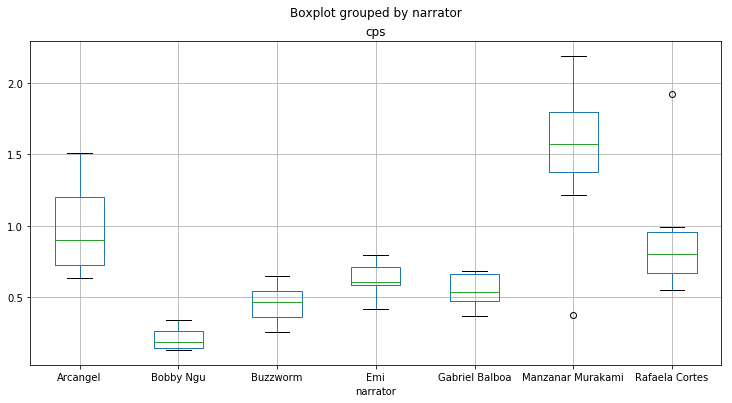

In [15]:
df_all.boxplot('cps',by='narrator', figsize=(12,6))

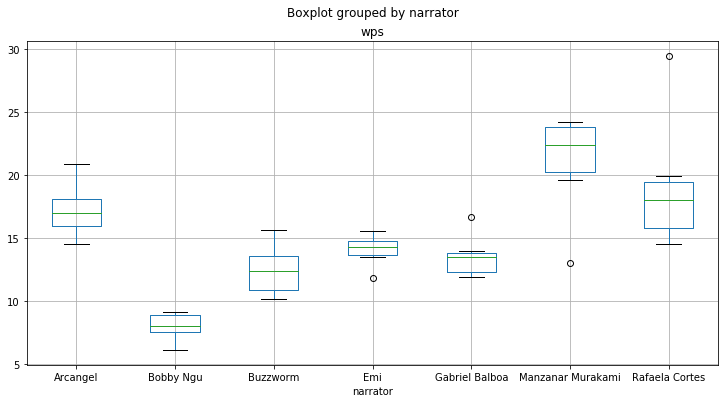

In [17]:
df_all.boxplot('wps',by='narrator', figsize=(12,6))

## 5) Save all results to an excel file

Useful for Tableau plotting.

In [77]:
df_all.to_excel('my_results.xls')